In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_probability as tfp
import time

import models
import flows

In [2]:
data = sio.loadmat("case3.mat")
x1 = data["x1"]
x2 = data["x2"]
y1 = data["y1"]
y2 = data["y2"]
w1 = data["w1"]
w2 = data["w2"]
A = data["A"]
k = data["k"]

x1_train = x1[0, :].reshape([-1, 1])
y1_train = y1[:500].T
x2_train = x2[0, :].reshape([-1, 1])
y2_train = y2[:500].T
w1_train = w1[:500]
w2_train = w2[:500]
A1_train = A[:500]
A2_train = A[2000:2500]
k1_train = k[:500]
k2_train = k[2000:2500]

In [3]:
meta = models.Meta(num_tasks=1000, dim=50, name="meta_MTL")

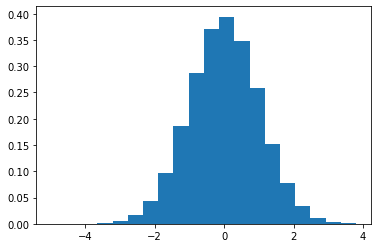

In [9]:
plt.hist(meta.heads.numpy().flatten(), bins=20, density=True)
plt.show()

In [10]:
loss = meta.train(
    x1_train,
    y1_train,
    x2_train,
    y2_train,
    niter=50000,
    ftol=1e-10,
)

0 9.847646 , time:  0.31999921798706055
1000 3.140564 , time:  0.778059720993042
2000 0.07286396 , time:  0.7930023670196533
3000 0.035216216 , time:  0.7699952125549316
4000 0.014829262 , time:  0.778998613357544
5000 0.02046002 , time:  0.7879986763000488
6000 0.006229631 , time:  0.7839999198913574
7000 0.0045026727 , time:  0.8250019550323486
8000 0.0030749768 , time:  0.8039984703063965
9000 0.0022156062 , time:  0.8169963359832764
10000 0.00173126 , time:  0.8089995384216309
11000 0.001429212 , time:  0.8239974975585938
12000 0.007335347 , time:  0.8479993343353271
13000 0.0016376802 , time:  0.8039999008178711
14000 0.0009249493 , time:  0.8280000686645508
15000 0.0010471903 , time:  0.8159992694854736
16000 0.0012067423 , time:  0.8410000801086426
17000 0.000847644 , time:  0.8420004844665527
18000 0.0006299297 , time:  0.8540003299713135
19000 0.0006432233 , time:  0.8769993782043457
20000 0.00066364004 , time:  0.8730001449584961
21000 0.0005213149 , time:  0.8239998817443848

In [11]:
meta.restore()
# loss[-1], min(loss)

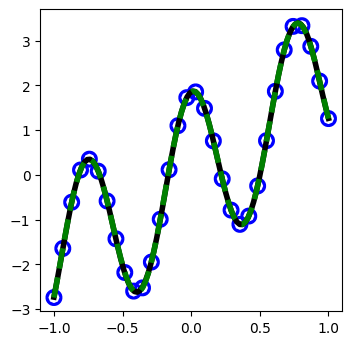

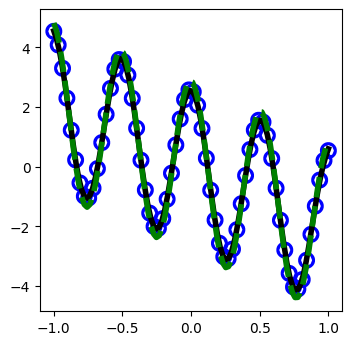

In [12]:
x_test = np.linspace(-1, 1, 100).reshape([-1, 1])
out1 = meta.call(
    tf.constant(x_test, tf.float32), meta.heads[:, :500]
)

i = 3
fig = plt.figure(dpi=100)
ax = fig.add_subplot()
ax.plot(
    x_test, out1[:, i], color="black", linestyle="-", linewidth=4,
)
ax.plot(
    x_test, 
    A1_train[i] * np.cos(w1_train[i] * x_test) + 2 * k1_train[i] * x_test, 
    color="green", 
    linestyle="--", 
    linewidth=4,
)

ax.scatter(x1_train, y1_train[:, i], s=5, color="blue", marker="o", facecolor="none", linewidths=10)
ax.set_box_aspect(1)

x_test = np.linspace(-1, 1, 100).reshape([-1, 1])
out2 = meta.call(
    tf.constant(x_test, tf.float32), meta.heads[:, 500:]
)

i = 100
fig = plt.figure(dpi=100)
ax = fig.add_subplot()
ax.plot(
    x_test, out2[:, i], color="black", linestyle="-", linewidth=4,
)
ax.plot(
    x_test, 
    A2_train[i] * np.cos(w2_train[i] * x_test) + 2 * k2_train[i] * x_test, 
    color="green", 
    linestyle="--", 
    linewidth=4,
)

ax.scatter(x2_train, y2_train[:, i], s=5, color="blue", marker="o", facecolor="none", linewidths=10)
ax.set_box_aspect(1)

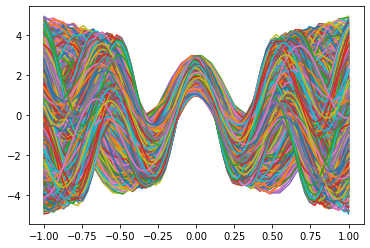

In [13]:
for i in range(500):
    plt.plot(x1_train, y1_train[:, i])
    
for i in range(500):
    plt.plot(x2_train, y2_train[:, i])

In [14]:
x_test = np.linspace(-1, 1, 100).reshape([-1, 1])
x_test = tf.constant(x_test, tf.float32)
basis = meta.shared_nn.call(x_test)

0


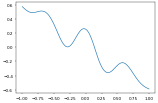

1


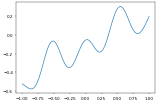

2


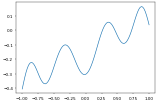

3


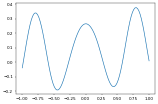

4


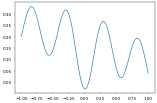

5


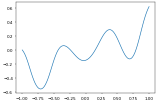

6


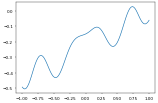

7


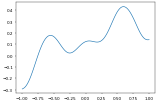

8


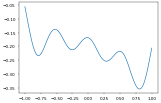

9


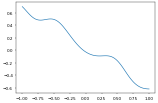

10


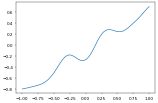

11


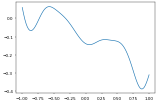

12


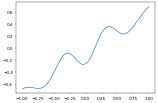

13


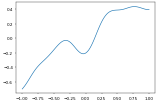

14


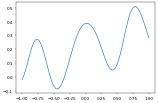

15


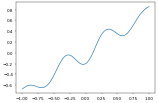

16


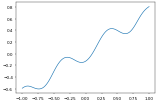

17


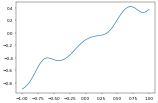

18


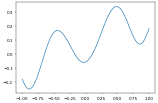

19


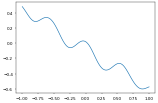

20


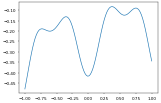

21


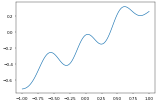

22


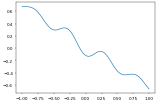

23


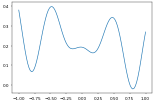

24


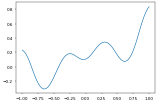

25


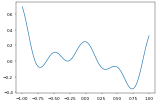

26


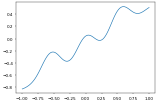

27


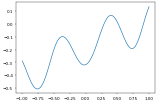

28


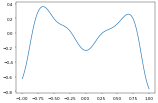

29


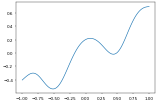

30


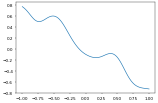

31


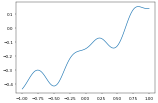

32


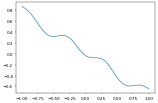

33


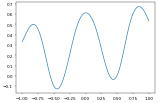

34


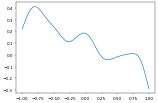

35


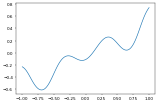

36


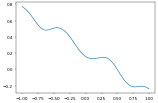

37


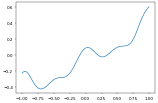

38


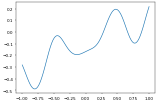

39


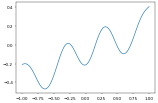

40


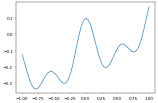

41


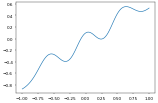

42


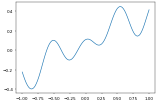

43


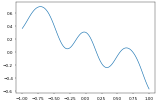

44


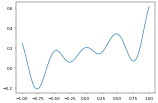

45


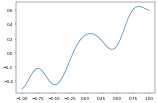

46


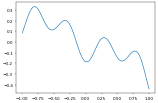

47


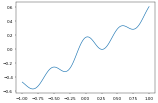

48


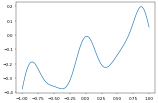

49


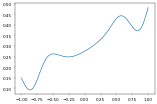

In [15]:
for i in range(50):
    print(i)
    plt.figure(dpi=30)
    plt.plot(x_test, basis[:, i])
    plt.show()

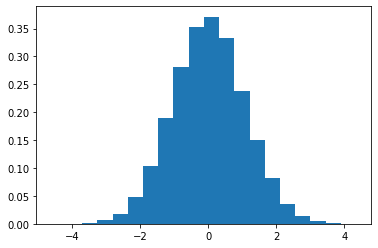

In [16]:
plt.hist(meta.heads.numpy().flatten(), bins=20, density=True)
plt.show()